# Importing some necessary libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Loading iris dataset

In [2]:
data = pd.read_csv("iris.data",header = None)
header = ["Sepallength","Sepalwidth","Petallength","Petalwidth","Species"]
data.to_csv("iris.csv",header = header,index = False)
data = pd.read_csv("iris.csv")

In [3]:
data.head(10)

,Sepallength,Sepalwidth,Petallength,Petalwidth,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


# Some basic information about the iris dataset

In [4]:
data.columns

Index(['Sepallength', 'Sepalwidth', 'Petallength', 'Petalwidth', 'Species'], dtype='object')

In [5]:
data.describe()

,Sepallength,Sepalwidth,Petallength,Petalwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sepallength  150 non-null    float64
 1   Sepalwidth   150 non-null    float64
 2   Petallength  150 non-null    float64
 3   Petalwidth   150 non-null    float64
 4   Species      150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
data.shape

(150, 5)

In [8]:
data.isnull().sum()

Sepallength    0
Sepalwidth     0
Petallength    0
Petalwidth     0
Species        0
dtype: int64

In [9]:
data.corr()

,Sepallength,Sepalwidth,Petallength,Petalwidth
Sepallength,1.000000,-0.109369,0.871754,0.817954
Sepalwidth,-0.109369,1.000000,-0.420516,-0.356544
Petallength,0.871754,-0.420516,1.000000,0.962757
Petalwidth,0.817954,-0.356544,0.962757,1.000000


In [10]:
data.tail(10)

,Sepallength,Sepalwidth,Petallength,Petalwidth,Species
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


# Data Visualization

In [11]:
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

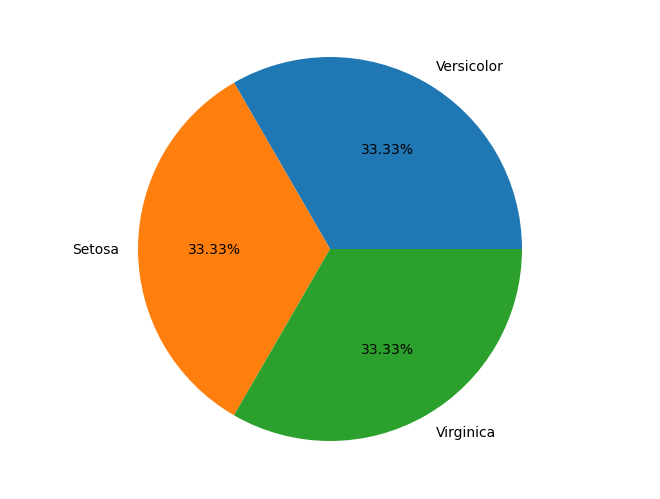

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virginica']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

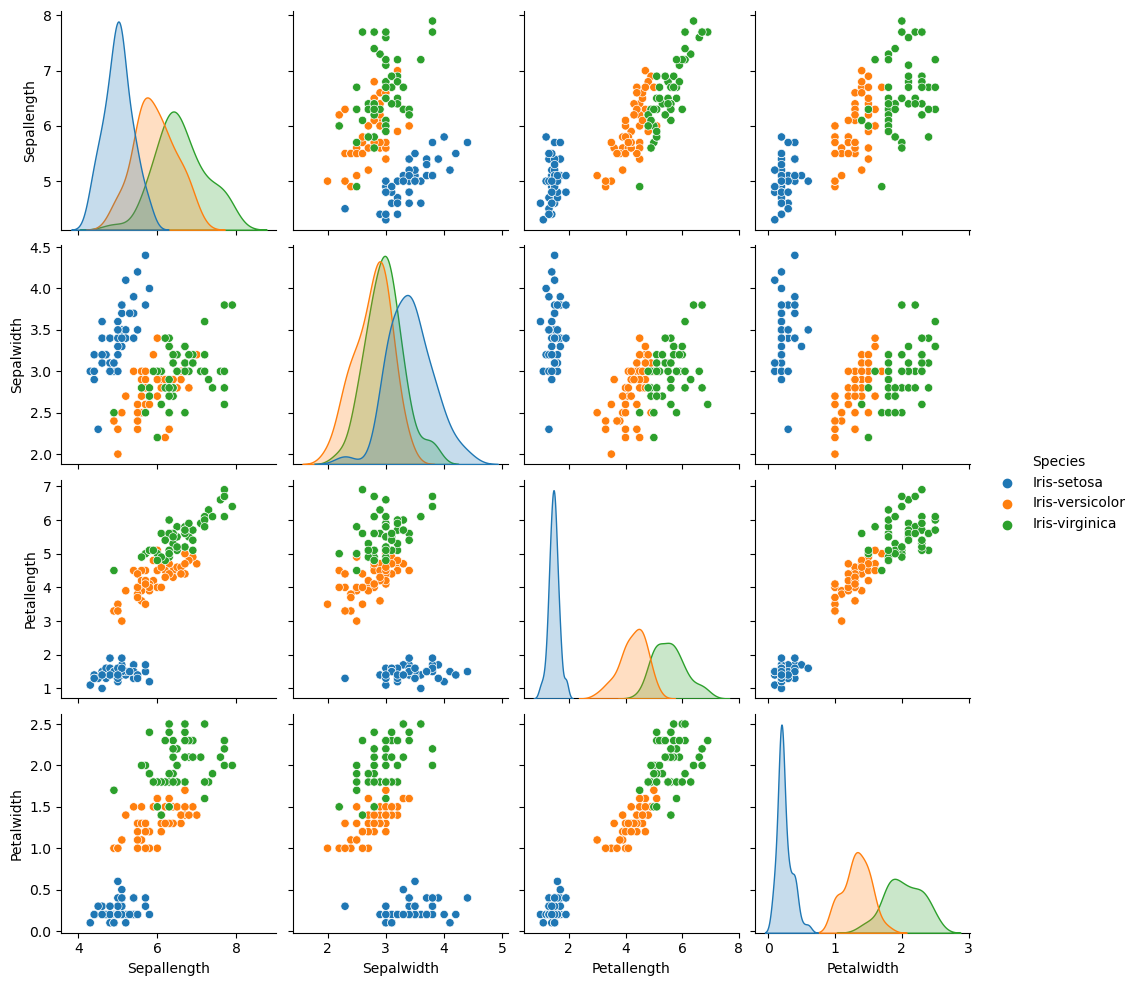

In [13]:
sns.pairplot(data,hue="Species")

# Building a model

In [14]:
# Splitting data into feature and target variables

X = data.drop('Species',axis=1)
y = data['Species']

In [15]:
X

,Sepallength,Sepalwidth,Petallength,Petalwidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [16]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [17]:
# splitting data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =32)

In [18]:
model = SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluating the model

In [19]:
# Confusion matrix and Classification report

from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(y_test,y_pred)
print(classification_report(y_test,y_pred))
print("Confusion matrix: \n",confusion_mat)

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        12
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.89      0.94         9

       accuracy                           0.97        30
      macro avg       0.97      0.96      0.96        30
   weighted avg       0.97      0.97      0.97        30

Confusion matrix: 
 [[12  0  0]
 [ 0  9  0]
 [ 0  1  8]]


In [20]:
# Accuracy of model
print("Accuracy Score:",accuracy_score(y_test,y_pred))

Accuracy Score: 0.9666666666666667
